# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations

- There seems to be little to no correlation between humidity and Latitude as well as with cloudiness and Latitude. The scatter plot visualizations display no visual trends.

- The lattitude Vs Max temp graph has a bell shaped curve which suggest that the closer you get to lattitude '0' (the equator) the hotter the temperatures are and they decrease as you travel in either direction away from latitude '0'.

- Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. 

- The Northern Hemisphere max temp and lattiude has the strongest correlation out of all the graphs displayed and we could potentially use the linear regression line to somewhat accurately predict max temps based on a countries latitude.


In [32]:
#Dependancies and imports
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import time
import json
import scipy.stats as st

#Api keys
from api_keys import weather_api_key

#citipy import
from citipy import citipy

#lat and long ranges
lat_range = (-90, 90)
lng_range =(-180, 180)



## Generate Cities List

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1600)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



630

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 167.7167,
        "lat": -45.4167
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 59.05,
        "feels_like": 59.27,
        "temp_min": 59.05,
        "temp_max": 59.05,
        "pressure": 1010,
        "humidity": 98,
        "sea_level": 1010,
        "grnd_level": 985
    },
    "visibility": 2940,
    "wind": {
        "speed": 2.1,
        "deg": 52,
        "gust": 10.29
    },
    "clouds": {
        "all": 100
    },
    "dt": 1650428326,
    "sys": {
        "country": "NZ",
        "sunrise": 1650396601,
        "sunset": 1650434755
    },
    "timezone": 43200,
    "id": 2181625,
    "name": "Te Anau",
    "cod": 200
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#set Variables
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")



Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hobart
Processing Record 2 | Epe
Processing Record 3 | Lookan
Processing Record 4 | Chitungwiza
Processing Record 5 | Rawson
Processing Record 6 | Kailua
Processing Record 7 | Loreto
Processing Record 8 | Rikitea
Processing Record 9 | Egvekinot
Processing Record 10 | Port Macquarie
Processing Record 11 | Dikson
Processing Record 12 | Hasaki
Processing Record 13 | Cockburn Town
Processing Record 14 | Kapaa
Processing Record 15 | Arraial do Cabo
Processing Record 16 | Mataura
Processing Record 17 | Albany
Processing Record 18 | Yellowknife
Processing Record 19 | Bealanana
City not found. Skipping...
Processing Record 20 | Atuona
Processing Record 21 | Port Alfred
Processing Record 22 | Bluff
Processing Record 23 | Cape Town
Processing Record 24 | Kushima
Processing Record 25 | Vanimo
Processing Record 26 | Norman Wells
City not found. Skipping...
Processing Record 27 | Busselton
Processing Record 28 | Bengkulu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

Weather_df = pd.DataFrame(weather_dict)

pd.DataFrame.to_csv(Weather_df, 'City_weather_data.csv')

Weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,62.46,50,20,17.27,AU,1650428332
1,Epe,6.5841,3.9834,77.81,91,92,1.77,NG,1650428332
2,Lookan,5.0370,120.1027,82.74,75,98,4.99,PH,1650428332
3,Chitungwiza,-18.0127,31.0756,53.74,95,100,6.44,ZW,1650428332
4,Rawson,-43.3002,-65.1023,61.36,40,99,5.41,AR,1650427962


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weather_df_flt = Weather_df[Weather_df['Humidity'] > 100]
weather_df_flt.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

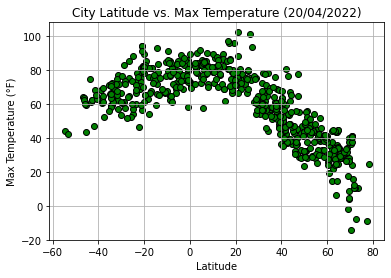

In [28]:
plt.scatter(Weather_df["Lat"], Weather_df["Max Temp"], facecolors="green", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (20/04/2022)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()



## Latitude vs. Humidity Plot

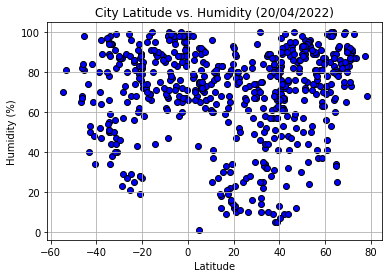

In [27]:
plt.scatter(Weather_df["Lat"], Weather_df["Humidity"], facecolors="blue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Humidity (20/04/2022)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

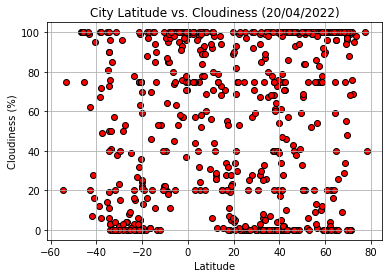

In [25]:
plt.scatter(Weather_df["Lat"], Weather_df["Cloudiness"], facecolors="red", marker="o", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (20/04/2022)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

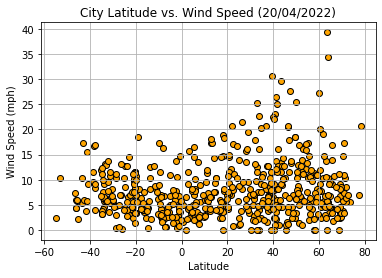

In [29]:
plt.scatter(Weather_df["Lat"], Weather_df["Wind Speed"], facecolors="orange", marker="o", edgecolor="black")

plt.title("City Latitude vs. Wind Speed (20/04/2022)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Wind Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [43]:
northern = Weather_df.loc[Weather_df["Lat"] >= 0.0]
southern = Weather_df.loc[Weather_df["Lat"] < 0.0]

correlation=round(st.pearsonr(northern['Lat'],northern['Max Temp'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(northern['Lat'],northern['Max Temp'])
model
 

The correlation coefficient is -0.88


LinregressResult(slope=-0.962033657360684, intercept=91.65623391034671, rvalue=-0.884470371554272, pvalue=1.5820511630795112e-128, stderr=0.02596669284534397, intercept_stderr=1.1352173954056335)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.88


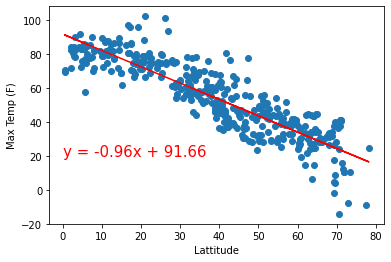

In [45]:
correlation=round(st.pearsonr(northern['Lat'],northern['Max Temp'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(northern['Lat'],northern['Max Temp'])


slope = -0.962033657360684
intercept = 91.65623391034671

y_axis = northern['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern['Lat'],northern['Max Temp'])
plt.plot(northern['Lat'],y_axis,color="red")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temp (F)');

plt.savefig("Nortehrn_Hem_Max_Temp_vs_Lattitude.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.56


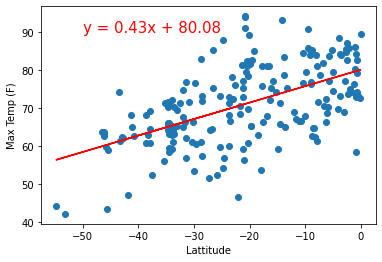

In [49]:
correlation=round(st.pearsonr(southern['Lat'],southern['Max Temp'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(southern['Lat'],southern['Max Temp'])


slope = 0.4329412116097228
intercept = 80.07680395495782

y_axis = southern['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern['Lat'],southern['Max Temp'])
plt.plot(southern['Lat'],y_axis,color="red")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temp (F)');

plt.savefig("Southern_Hem_Max_Temp_vs_Lattitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.26


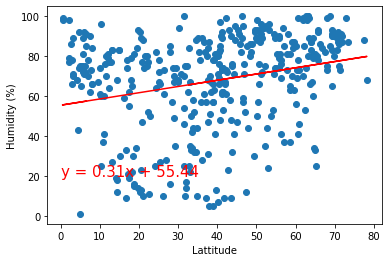

In [50]:
correlation=round(st.pearsonr(northern['Lat'],northern['Humidity'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(northern['Lat'],northern['Humidity'])


slope = 0.3124333163685088
intercept = 55.43740678282178

y_axis = northern['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern['Lat'],northern['Humidity'])
plt.plot(northern['Lat'],y_axis,color="red")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)');

plt.savefig("Northern_Hem_Humidity_vs_Lattitude.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.29


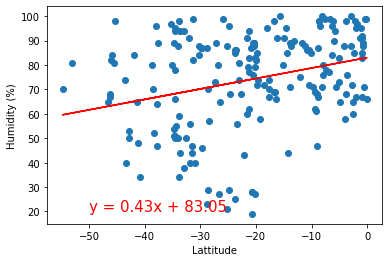

In [53]:
correlation=round(st.pearsonr(southern['Lat'],southern['Humidity'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(southern['Lat'],southern['Humidity'])


slope = 0.428013964452479
intercept = 83.05434852614901

y_axis = southern['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern['Lat'],southern['Humidity'])
plt.plot(southern['Lat'],y_axis,color="red")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)');

plt.savefig("Southern_Hem_Humidity_vs_Lattitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.09


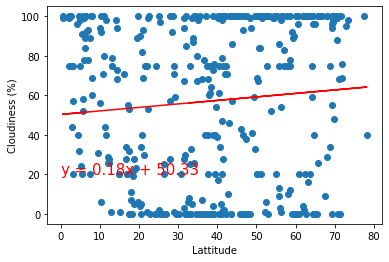

In [55]:
correlation=round(st.pearsonr(northern['Lat'],northern['Cloudiness'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(northern['Lat'],northern['Cloudiness'])

slope = 0.1770445140787561
intercept = 50.334622716158094

y_axis = northern['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern['Lat'],northern['Cloudiness'])
plt.plot(northern['Lat'],y_axis,color="red")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)');

plt.savefig("Northern_Hem_Cloudiness_vs_Lattitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.26


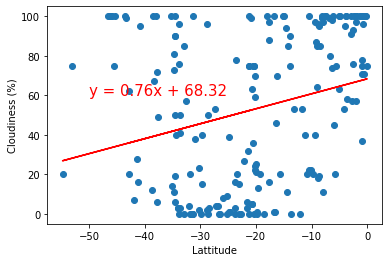

In [58]:
correlation=round(st.pearsonr(southern['Lat'],southern['Cloudiness'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(southern['Lat'],southern['Cloudiness'])

slope = 0.7561865779131952
intercept = 68.32324458195045

y_axis = southern['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern['Lat'],southern['Cloudiness'])
plt.plot(southern['Lat'],y_axis,color="red")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)');

plt.savefig("Southern_Hem_Cloudiness_vs_Lattitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.09


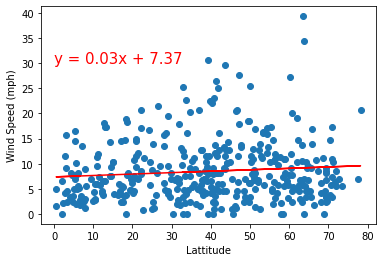

In [61]:
correlation=round(st.pearsonr(northern['Lat'],northern['Wind Speed'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(northern['Lat'],northern['Wind Speed'])

slope = 0.028377370124545744
intercept = 7.366038941654194

y_axis = northern['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern['Lat'],northern['Wind Speed'])
plt.plot(northern['Lat'],y_axis,color="red")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)');

plt.savefig("Northern_Hem_Wind_Speed_vs_Lattitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.25


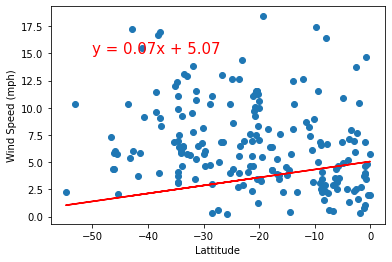

In [64]:
correlation=round(st.pearsonr(southern['Lat'],southern['Wind Speed'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(southern['Lat'],southern['Wind Speed'])

slope = 0.07331225531643087
intercept = 5.065930176575894

y_axis = southern['Lat']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern['Lat'],southern['Wind Speed'])
plt.plot(southern['Lat'],y_axis,color="red")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)');

plt.savefig("Southern_Hem_Wind_Speed_vs_Lattitude.png")
plt.show()